## Data Preprocessing
- 영상 데이터 전처리

#### 정형데이터 전처리

In [3]:
# 정형 데이터 전처리
import seaborn as sns
import pandas as pd
!pip install missingno
import missingno as msno

In [4]:
tit = sns.load_dataset('titanic')
df = pd.DataFrame(tit)
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

<Axes: >

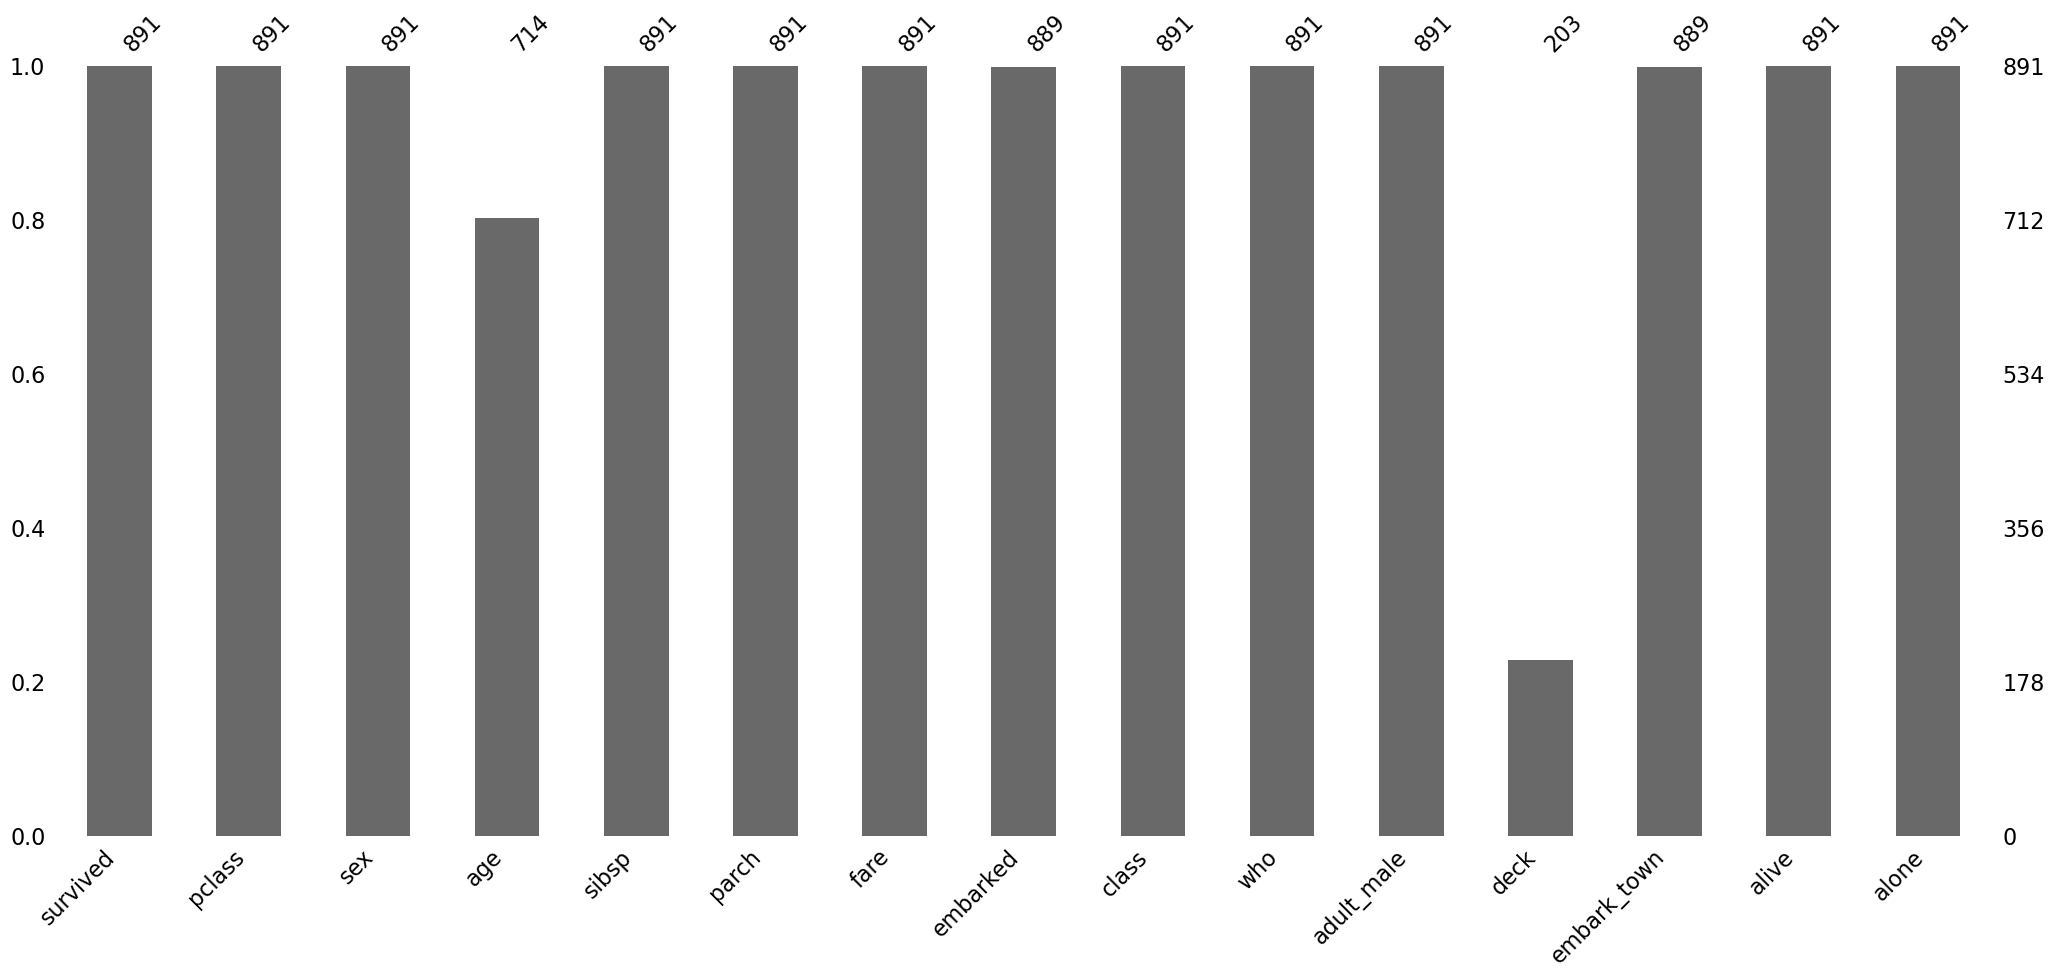

In [5]:
msno.bar(df)

<Axes: >

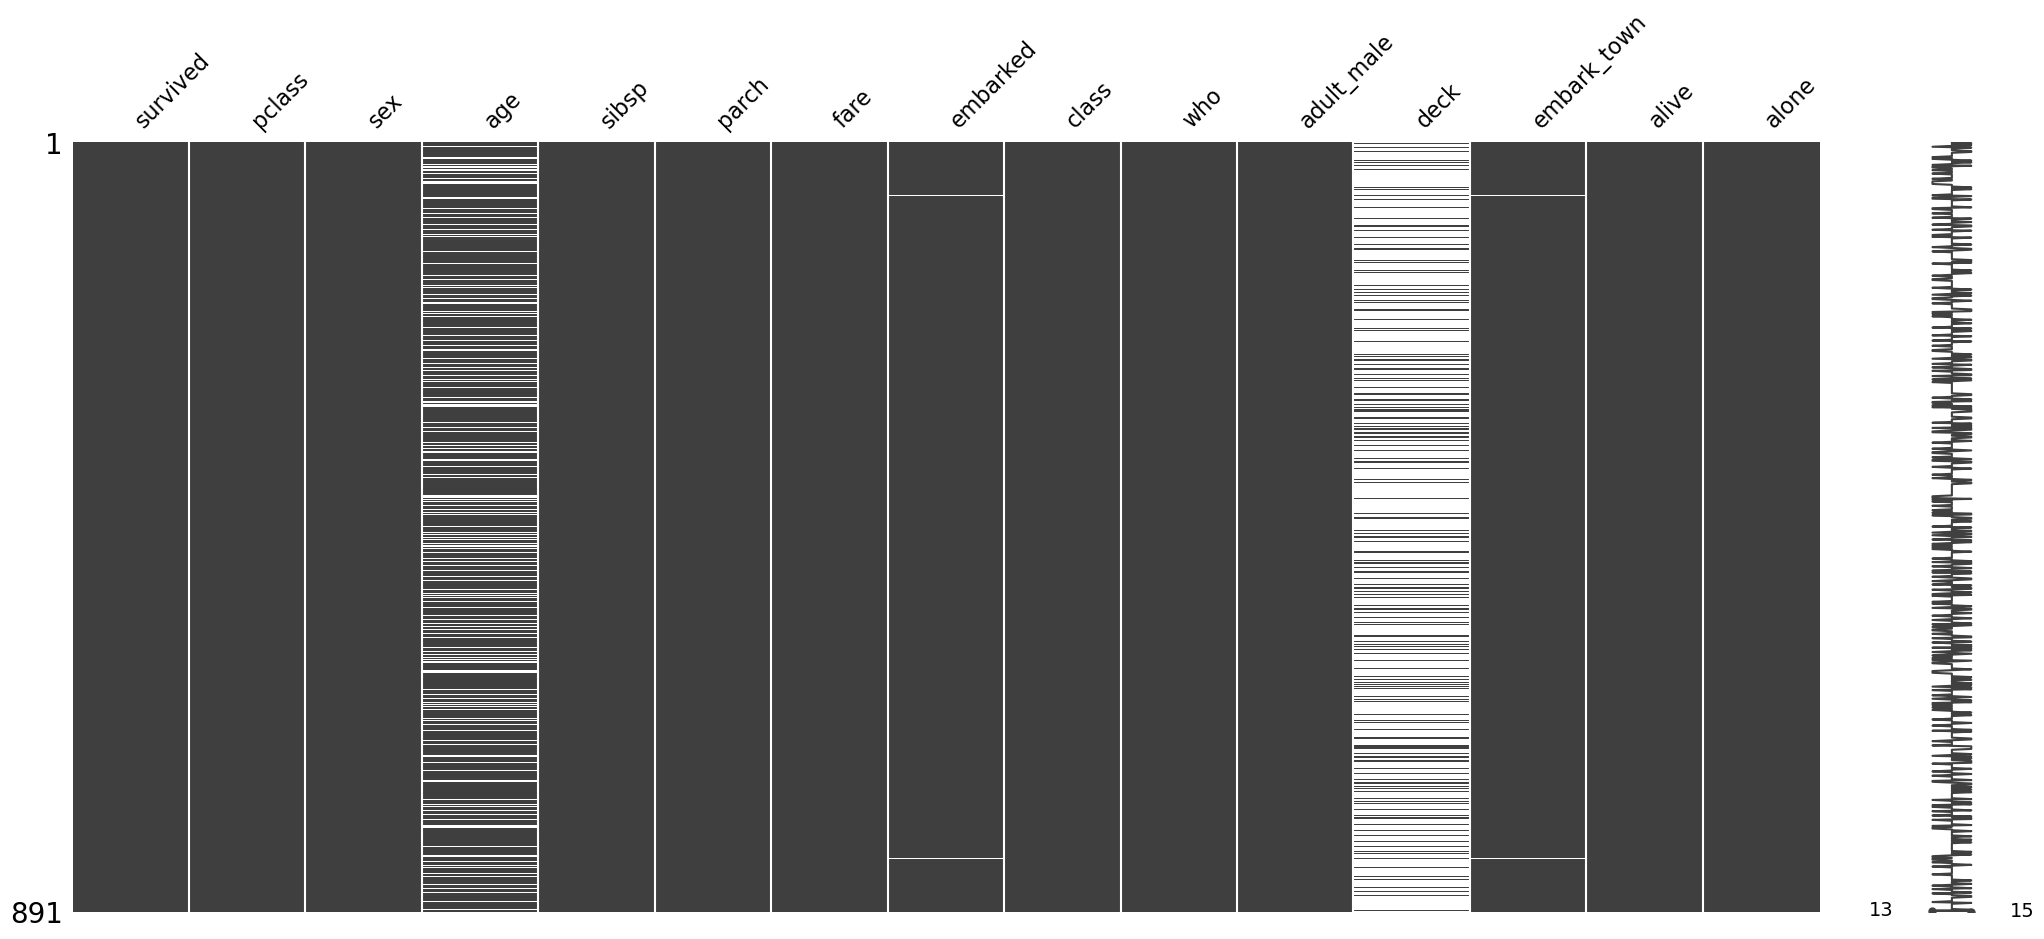

In [6]:
msno.matrix(df)

### 영상데이터 전처리

### 환경구성

#### 설치 라이브러리
```python
!pip install opencv-python
```

In [7]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

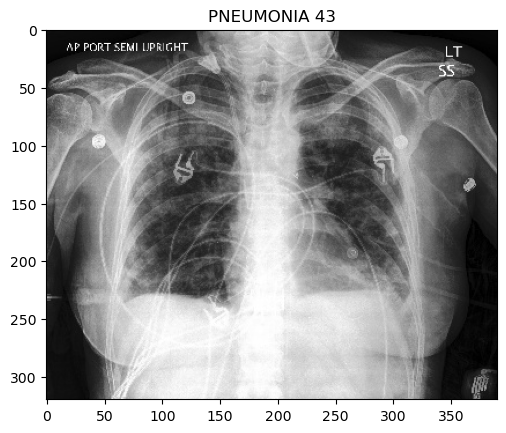

In [8]:
# data 경로 설정
data_dir = 'C:/Users/KOREAVC/Desktop/pnuemonia/Positive'
# categories = ['train', 'test', 'val'] # 전처리된 데이터셋을 훈련용, 평가용, 검증용으로 구분

# 샘플 이미지 시각화
img_name = os.listdir(data_dir)[42]
img_path = os.path.join(data_dir, img_name)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title(f'PNEUMONIA 43')
plt.show()

### Image Resize

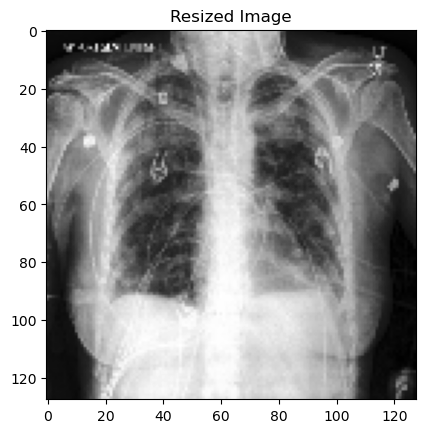

In [9]:
def resize_image(img, size=(128, 128)):
    return cv2.resize(img, size)

resized_img = resize_image(img)
plt.imshow(resized_img, cmap='gray')
plt.title('Resized Image')
plt.show()

### Histogram Equalization
- image level 평활화

In [10]:
?cv2.equalizeHist

Docstring:
equalizeHist(src[, dst]) -> dst
.   @brief Equalizes the histogram of a grayscale image.
.   
.   The function equalizes the histogram of the input image using the following algorithm:
.   
.   - Calculate the histogram \f$H\f$ for src .
.   - Normalize the histogram so that the sum of histogram bins is 255.
.   - Compute the integral of the histogram:
.   \f[H'_i =  \sum _{0  \le j < i} H(j)\f]
.   - Transform the image using \f$H'\f$ as a look-up table: \f$\texttt{dst}(x,y) = H'(\texttt{src}(x,y))\f$
.   
.   The algorithm normalizes the brightness and increases the contrast of the image.
.   
.   @param src Source 8-bit single channel image.
.   @param dst Destination image of the same size and type as src .
Type:      builtin_function_or_method

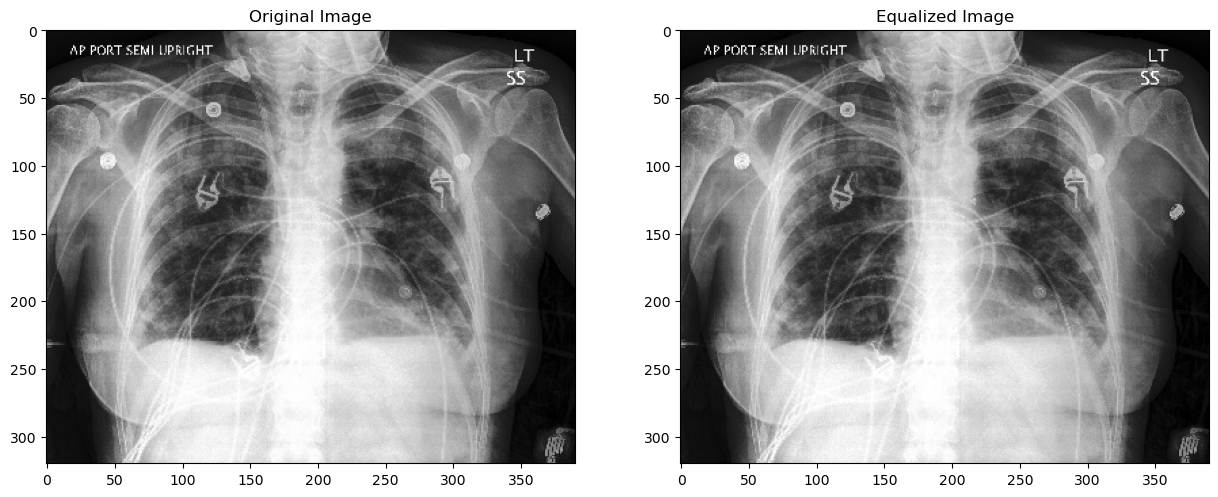

In [11]:
def he_img(img):
    return cv2.equalizeHist(img)

equalized_img = he_img(img)
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

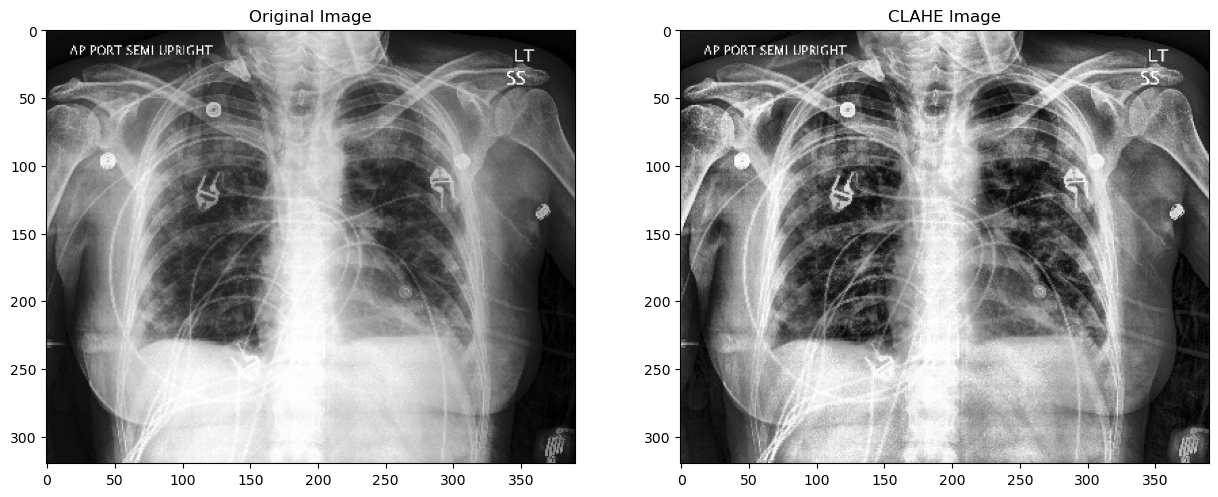

In [25]:
# Histogram Equalization CLAHE(Contrast Limited Adaptive Histogram Equalization)
def clahe_image(img):
    clahe = cv2.createCLAHE(clipLimit=2., tileGridSize=(8, 8))
    cl_img = clahe.apply(img)
    return cl_img

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(clahe_image(img), cmap='gray')
plt.title('CLAHE Image')
plt.show()

### Data Augmentation
- 데이터의 수를 증가시켜 학습, 평가용 데이터를 추가 확보
- 데이터의 표본(n수)이 적을 때 주로 사용

In [13]:
from tensorflow.keras.preprocessing.image import ImageGenerator

ModuleNotFoundError: No module named 'tensorflow'

### Noise Reduction

In [14]:
?cv2.fastNlMeansDenoising

Docstring:
fastNlMeansDenoising(src[, dst[, h[, templateWindowSize[, searchWindowSize]]]]) -> dst
.   @brief Perform image denoising using Non-local Means Denoising algorithm
.   <http://www.ipol.im/pub/algo/bcm_non_local_means_denoising/> with several computational
.   optimizations. Noise expected to be a gaussian white noise
.   
.   @param src Input 8-bit 1-channel, 2-channel, 3-channel or 4-channel image.
.   @param dst Output image with the same size and type as src .
.   @param templateWindowSize Size in pixels of the template patch that is used to compute weights.
.   Should be odd. Recommended value 7 pixels
.   @param searchWindowSize Size in pixels of the window that is used to compute weighted average for
.   given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater
.   denoising time. Recommended value 21 pixels
.   @param h Parameter regulating filter strength. Big h value perfectly removes noise but also
.   removes image details, small

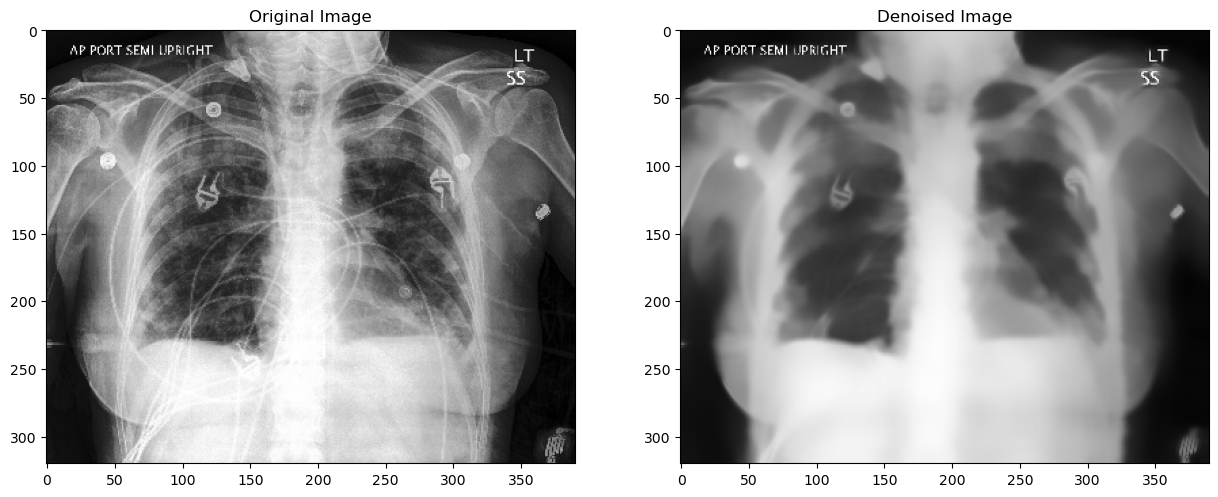

In [15]:
def denoise_img(img):
    return cv2.fastNlMeansDenoising(img, None, 30, 7, 21)

denoised_img = denoise_img(img)
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.show()

### Image Normalization
- 데이터 정규화 처리
- 연산 효율 높이고 정규성을 생성

In [16]:
?cv2.normalize

Docstring:
normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
.   @brief Normalizes the norm or value range of an array.
.   
.   The function cv::normalize normalizes scale and shift the input array elements so that
.   \f[\| \texttt{dst} \| _{L_p}= \texttt{alpha}\f]
.   (where p=Inf, 1 or 2) when normType=NORM_INF, NORM_L1, or NORM_L2, respectively; or so that
.   \f[\min _I  \texttt{dst} (I)= \texttt{alpha} , \, \, \max _I  \texttt{dst} (I)= \texttt{beta}\f]
.   
.   when normType=NORM_MINMAX (for dense arrays only). The optional mask specifies a sub-array to be
.   normalized. This means that the norm or min-n-max are calculated over the sub-array, and then this
.   sub-array is modified to be normalized. If you want to only use the mask to calculate the norm or
.   min-max but modify the whole array, you can use norm and Mat::convertTo.
.   
.   In case of sparse matrices, only the non-zero values are analyzed and transformed. Because of this,
.   the range 

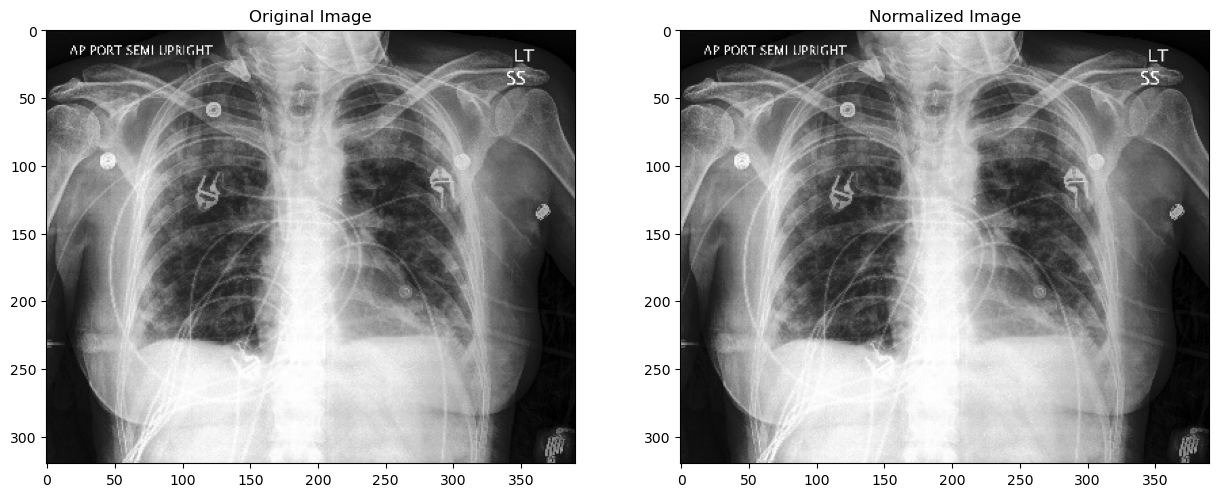

In [17]:
def normalize_img(img):
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

normalized_img = normalize_img(img)
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized Image')
plt.show()

### Edge Detection

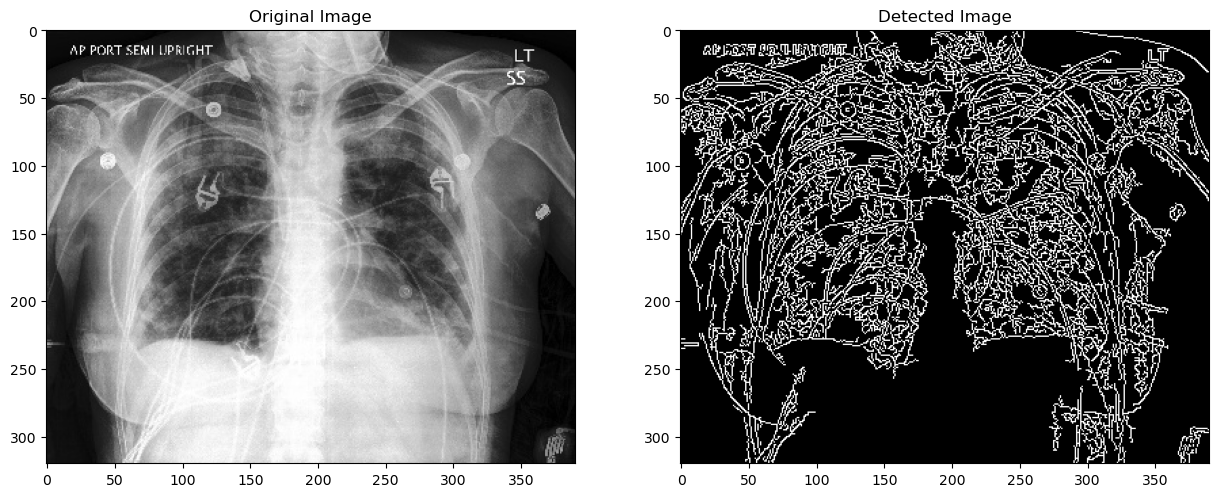

In [18]:
def detect_edge(img):
    return cv2.Canny(img, 30, 200)

detected_img = detect_edge(img)
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(detected_img, cmap='gray')
plt.title('Detected Image')
plt.show()

### Blurring

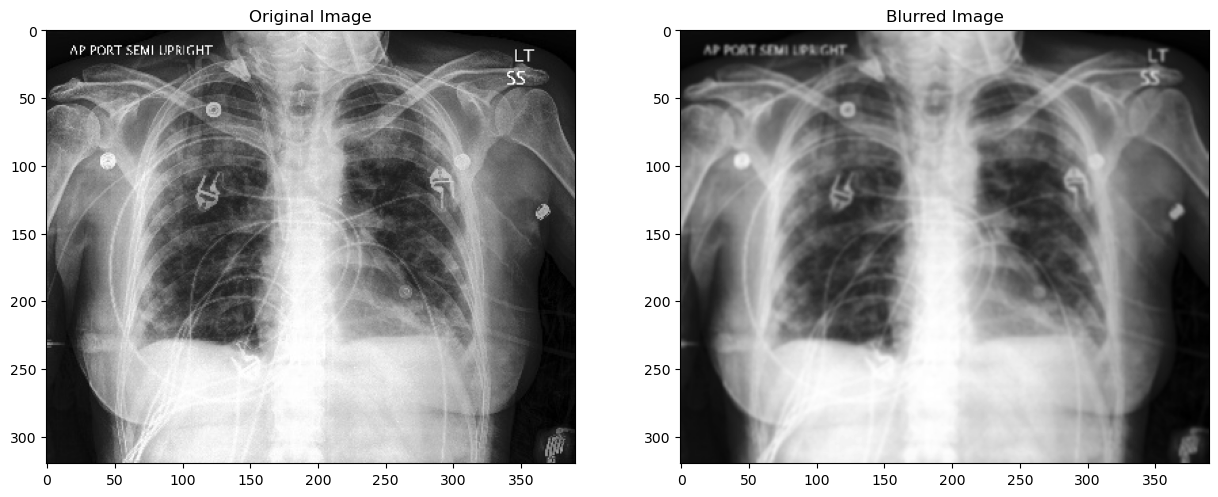

In [19]:
def blur_img(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

blurred_img = blur_img(img)
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.show()

### Contour Detection

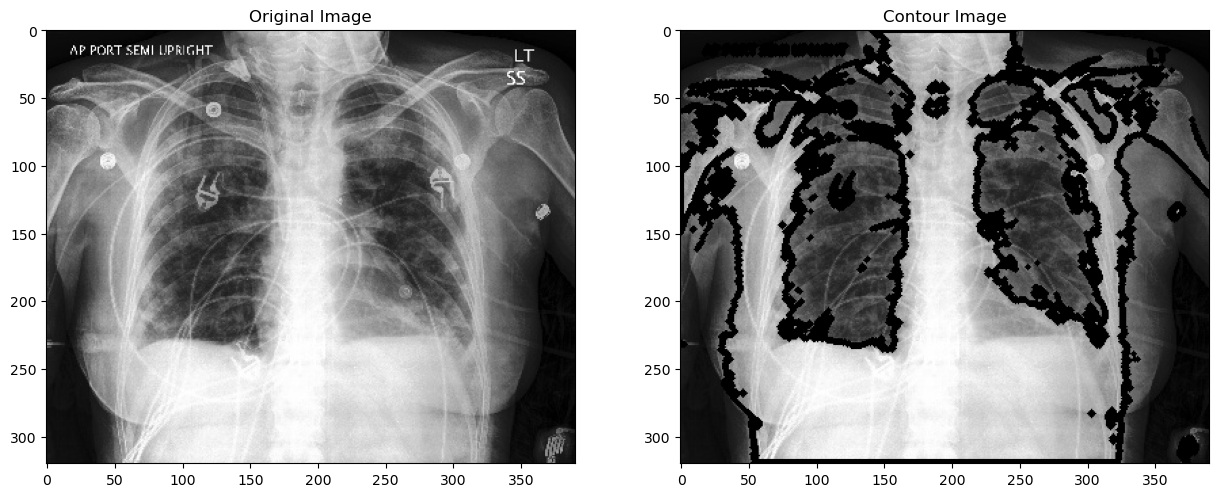

In [20]:
def find_contour(img):
    ret, thresh = cv2.threshold(img, 127, 255, 0)
    contours, hiearchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

contours = find_contour(img)
contour_img = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0),  3)

plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(contour_img, cmap='gray')
plt.title('Contour Image')
plt.show()

### Data Preparing

In [ ]:
def load_data(data_dir):
    images = []
    # labels = []
    for img_path in os.listdir(data_dir):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = resize_image(img)
        img = clahe_image(img)
        img = normalize_img(img)
        images.append(img)
        
    prepared_datas = np.array(images)
    return prepared_datasW